<a href="https://colab.research.google.com/github/polina-minaeva/stationarity-of-time-series/blob/main/1_%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2_%D0%B8_%D0%B4%D0%BE%D1%81%D1%82%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D1%81%D1%82%D0%B0%D1%86%D0%B8%D0%BE%D0%BD%D0%B0%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Загрузим табличные данные о 1) ежемесячных авиаперевозках пассажиров, 2) ежемесячных продажах машин в Квебеке, 3) ежемесячных продажах компании. Временные ряды проанализируем и сделаем стационарными

In [50]:
import pandas as pd

In [51]:
airlines_passengers = pd.read_csv('international-airline-passengers.csv')
car_sales = pd.read_csv('monthly-car-sales-in-quebec-1960.csv')
sales_of_company_x = pd.read_csv('monthly-sales-of-company-x-jan-6.csv')

Проанализируем временные ряды. Построим графики, расследуем на сезонность

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
all_series = {
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Monthly car sales in Quebec in 1960": car_sales["Count"],
    "Monthly sales of company X": sales_of_company_x["Count"]
}

In [54]:
all_series.keys()

dict_keys(['International airline passengers: monthly totals in thousands', 'Monthly car sales in Quebec in 1960', 'Monthly sales of company X'])

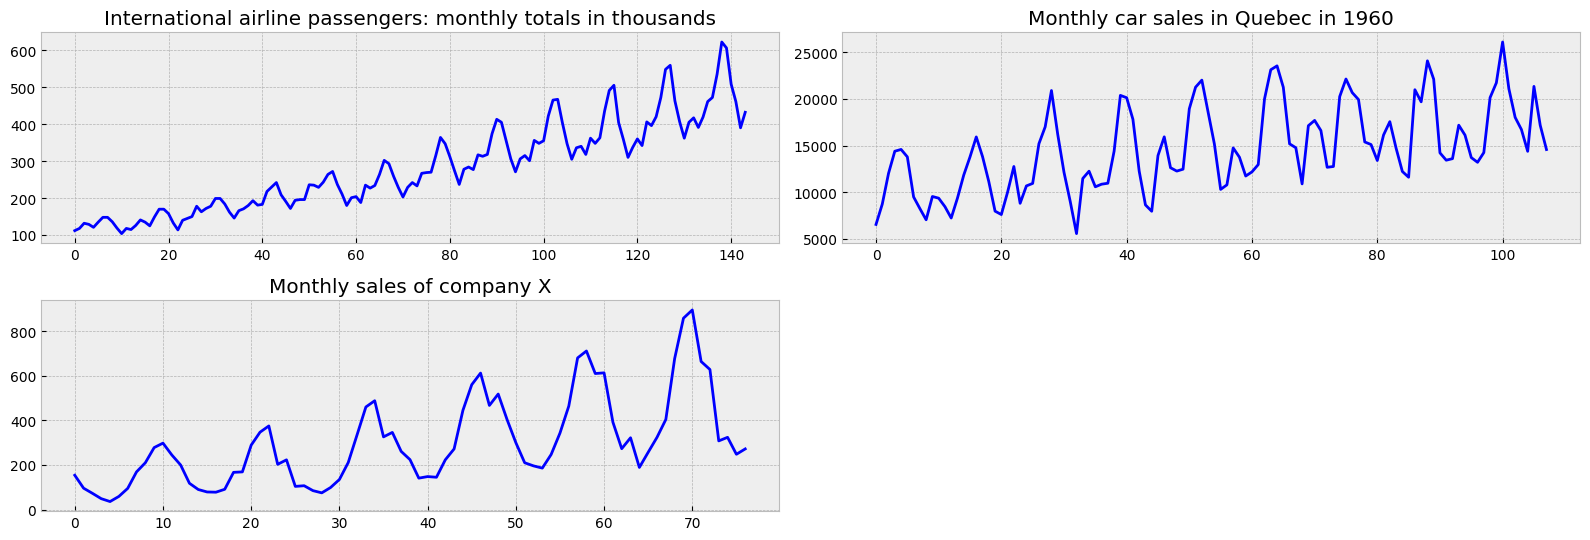

In [55]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)

        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)

    plt.tight_layout()

Визуально оценивая графики, можно увидеть
- на графике 1: сезонность, постепенное увеличение значений
- на графике 2: сезонность, постепенное увеличение значений
- на графике 3: сезонность, постепенное увеличение значений

Оценивая все графики внешне, они не стационарны

Теперь обозначим сезонность на графиках

In [56]:
#создаем функцию

def plot_ts_and_points(ts, start_point, step):
    new_series = [None for i in range(len(ts))] #набор данных из none
    for i in range(len(ts)):
        pos = start_point + step * i #точки
        if pos >= len(ts):
            break
        new_series[pos] = ts[pos] #передаем точки в массив new_series
    new_series = pd.Series(new_series)

    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        ts_ax = plt.axes()
        ts.plot(ax=ts_ax, color='blue') #рисуем изначаный временный ряд
        new_series.plot(ax=ts_ax, style='ro') #рисуем точки

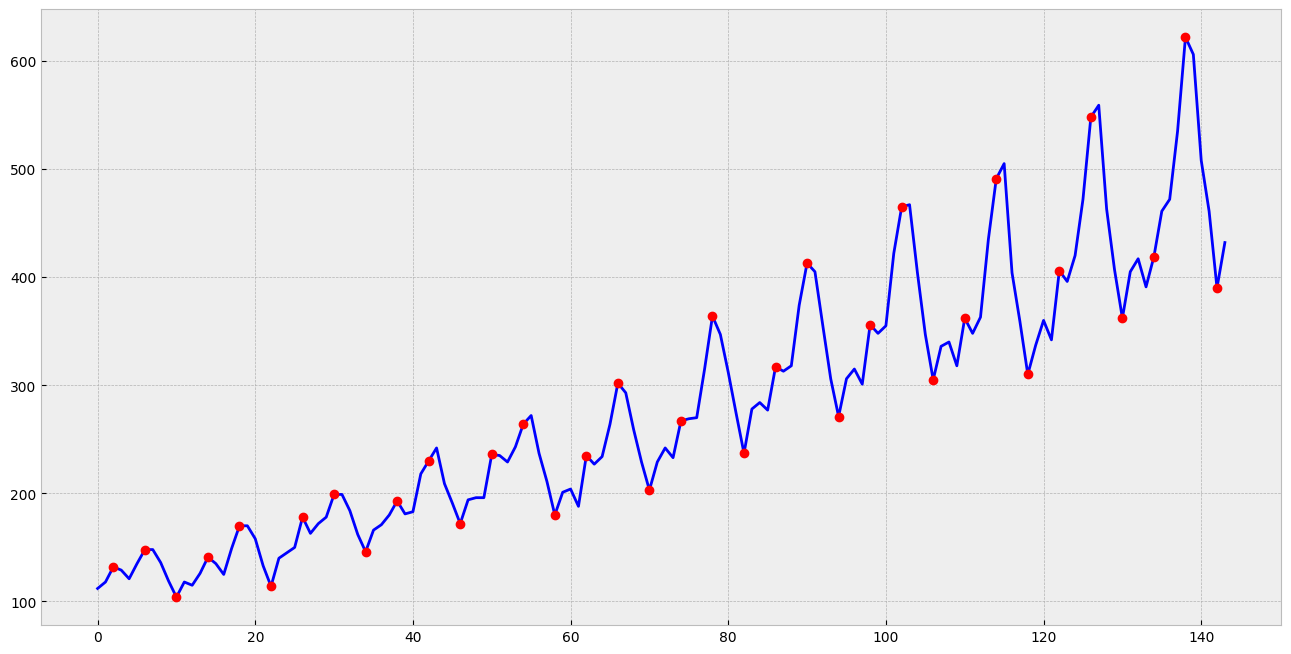

In [57]:
#подставляем значения в функцию

plot_ts_and_points(airlines_passengers['Count'], 2, 4)

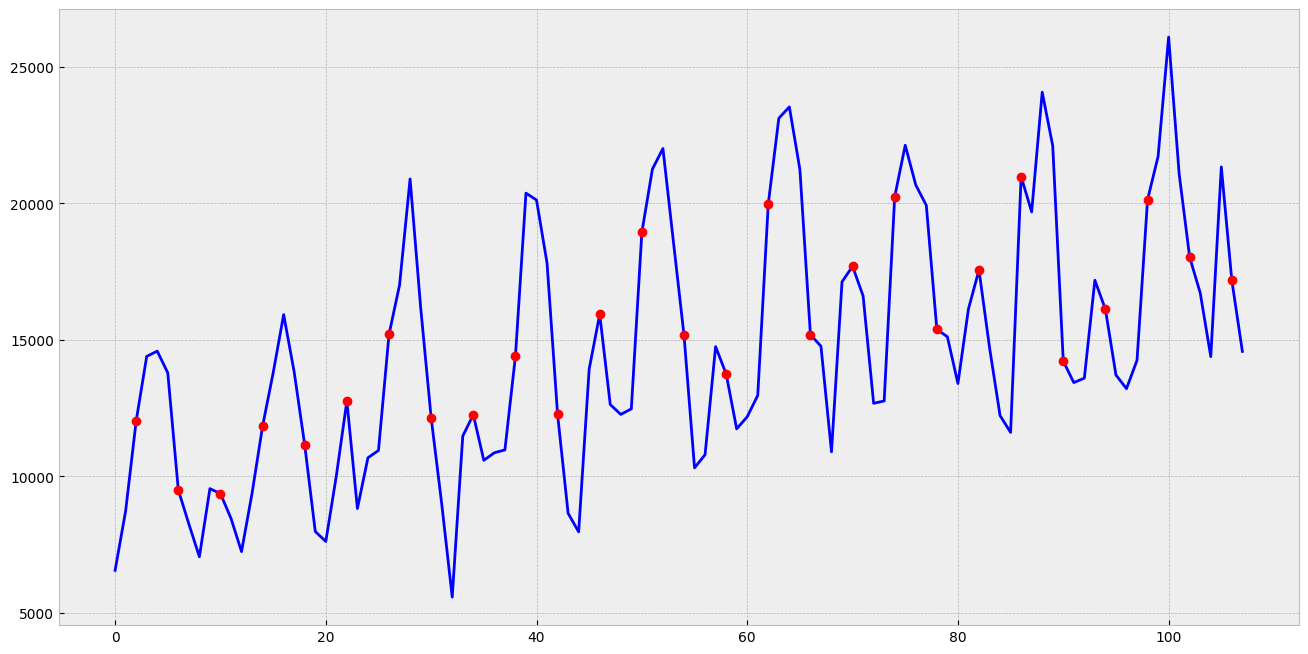

In [58]:
plot_ts_and_points(car_sales['Count'], 2, 4)

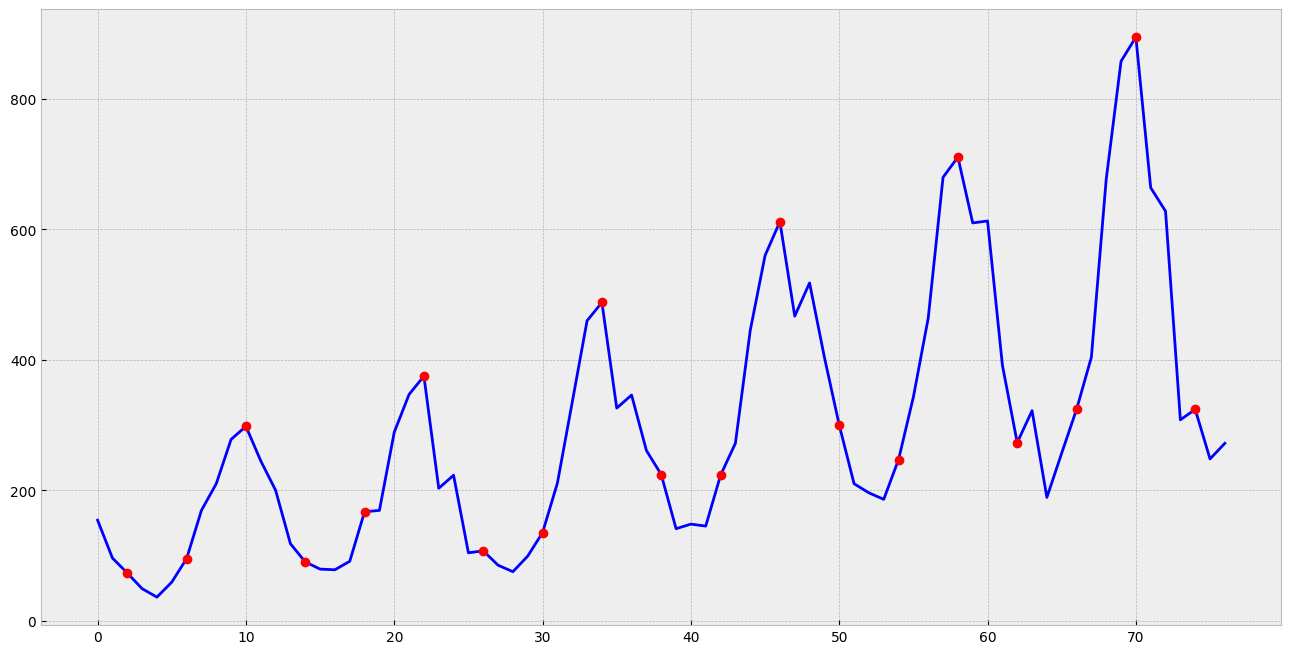

In [59]:
plot_ts_and_points(sales_of_company_x['Count'], 2, 4)

Теперь сделаем временные ряды стационарными. Для этого сначала нормализуем дисперсию с помощью преобразования Бокса-Кокса, а потом дифференцируем значения

In [60]:
from scipy.stats import boxcox

In [61]:
series1 = boxcox(all_series["International airline passengers: monthly totals in thousands"], 0)

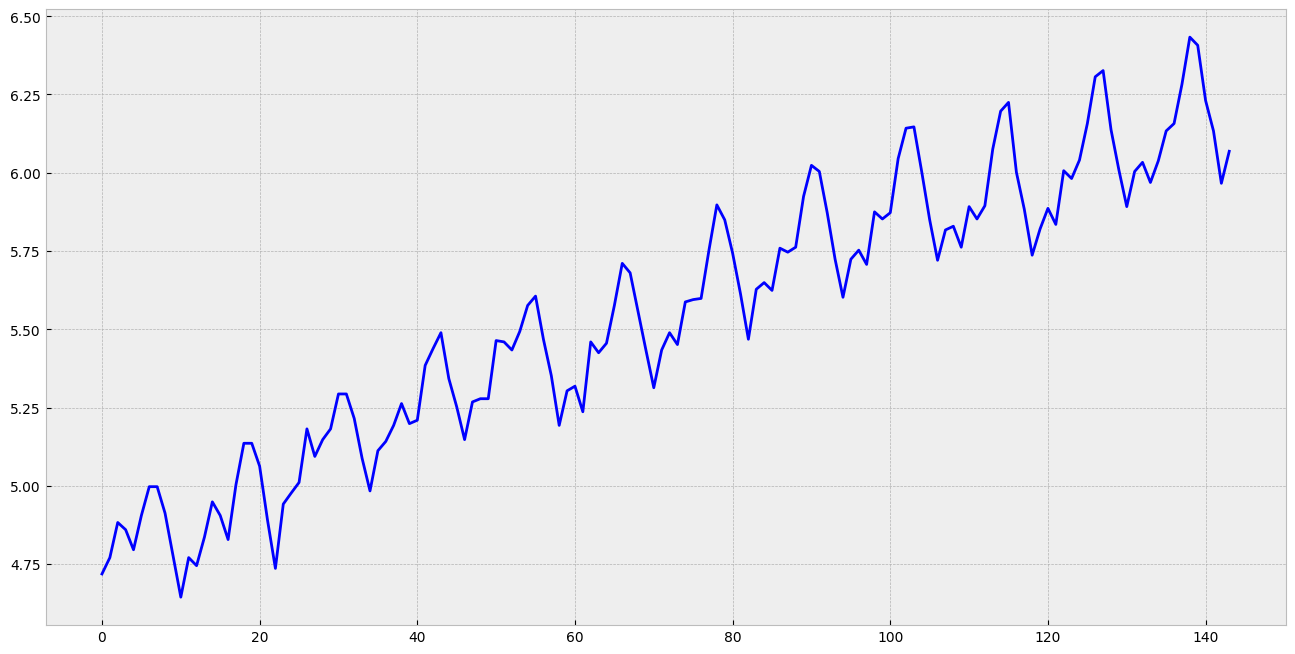

In [62]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series1, color='blue')

In [63]:
import numpy as np

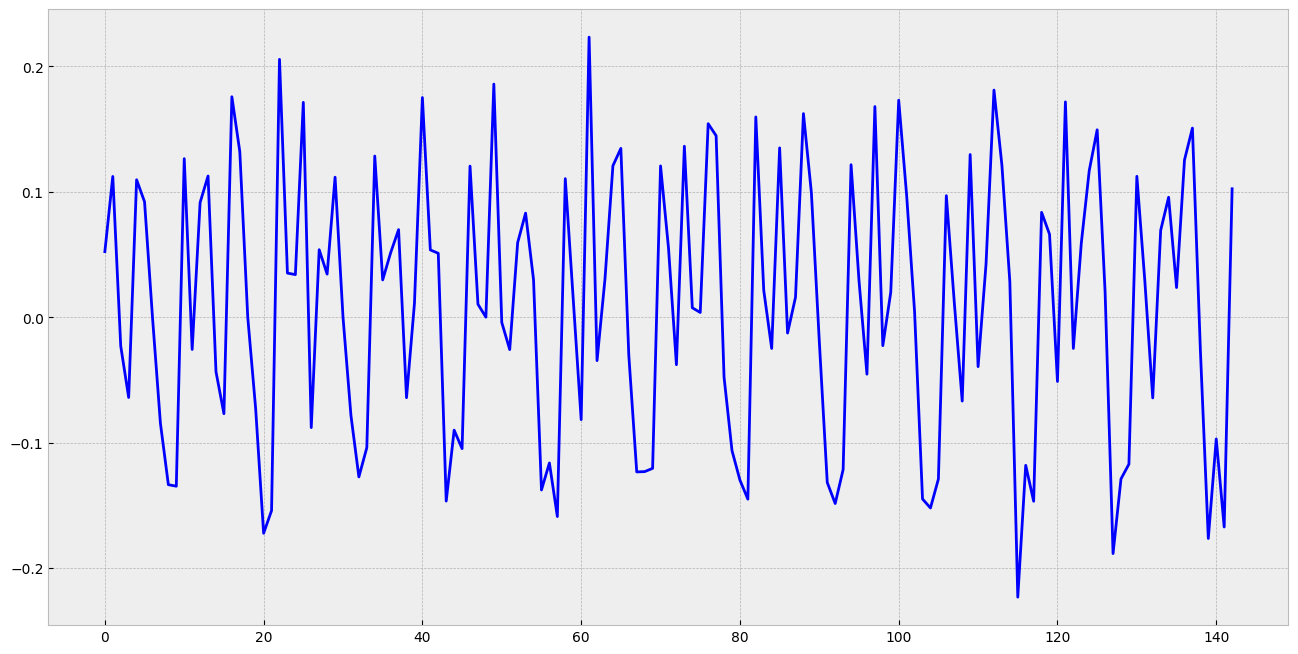

In [64]:
series1 = np.diff(series1, 1)

with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series1, color='blue')

In [65]:
series2 = boxcox(all_series["Monthly car sales in Quebec in 1960"], 0)

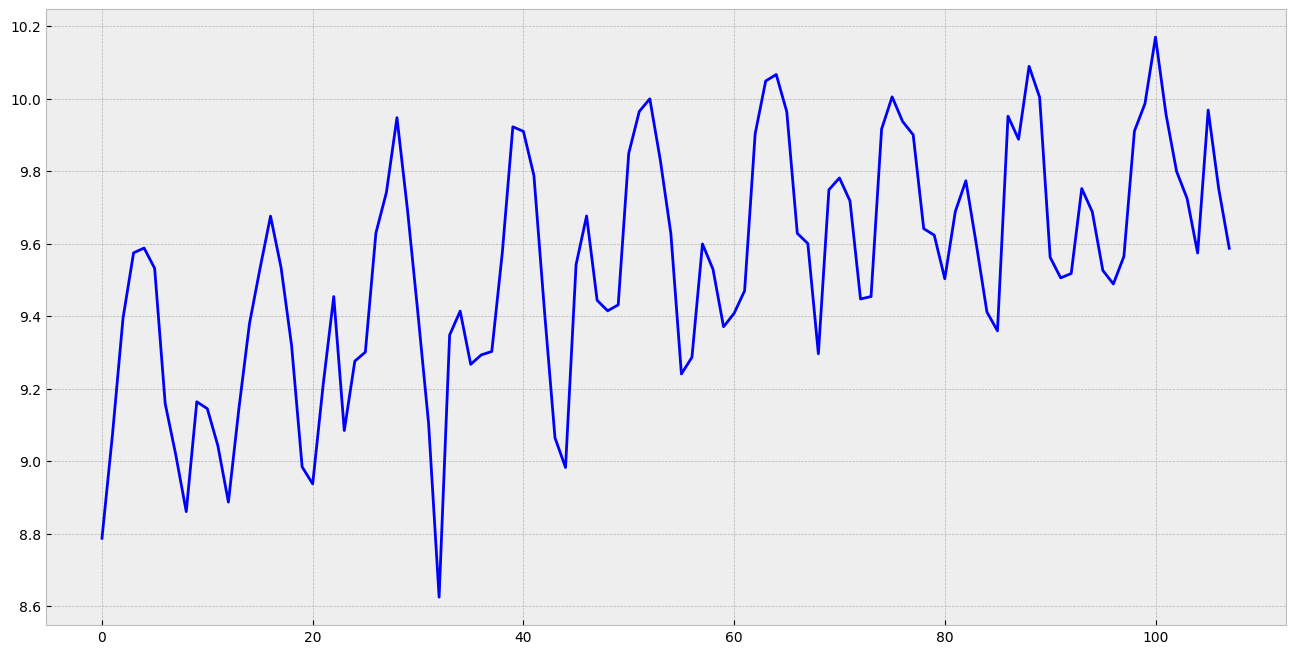

In [66]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series2, color='blue')

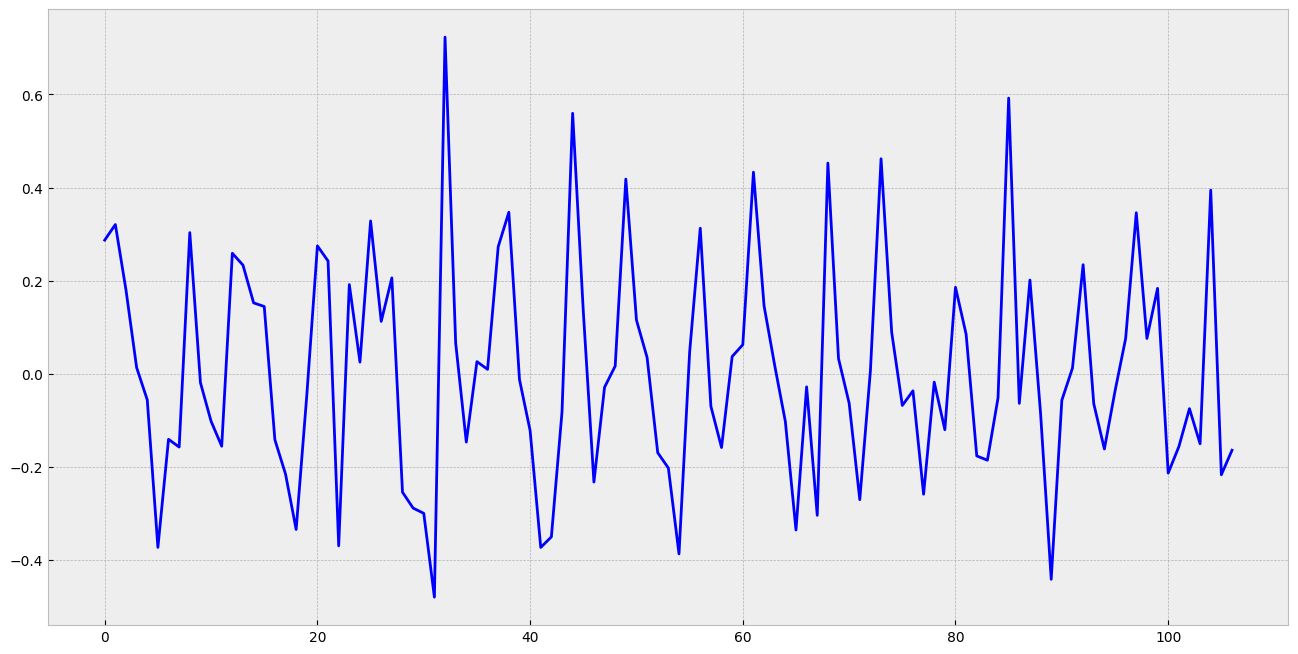

In [67]:
series2 = np.diff(series2, 1)

with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series2, color='blue')

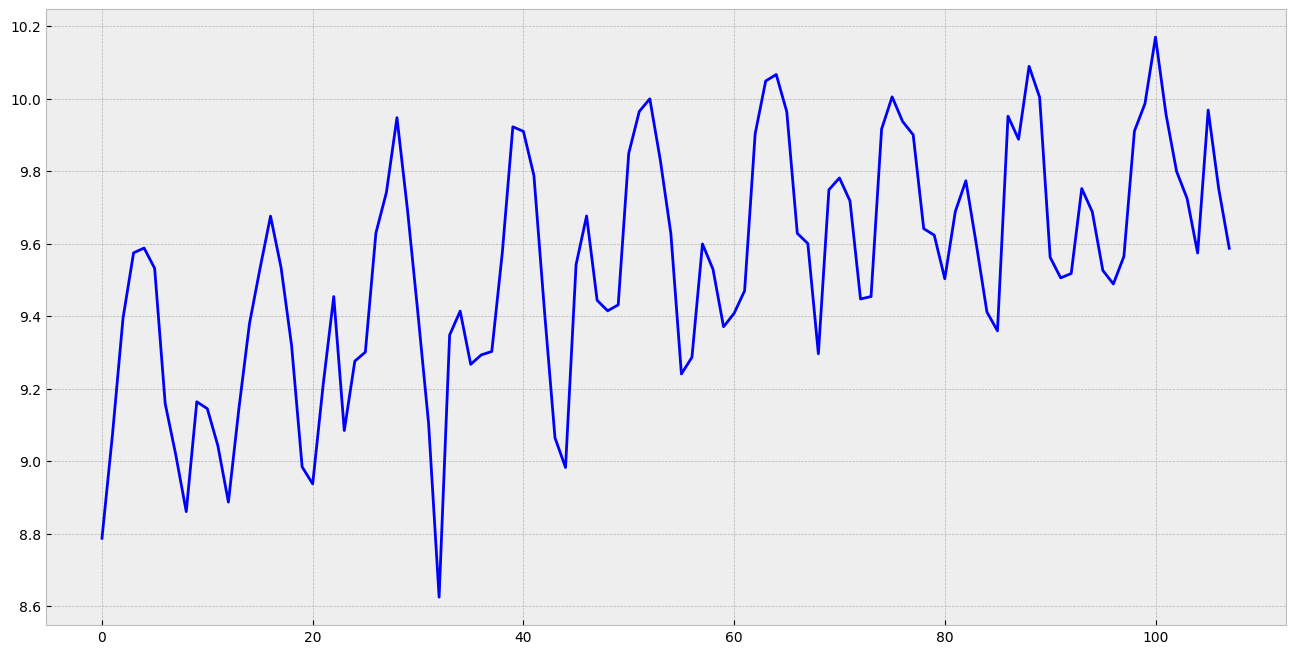

In [68]:
series3 = boxcox(all_series["Monthly car sales in Quebec in 1960"], 0)

with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series3, color='blue')

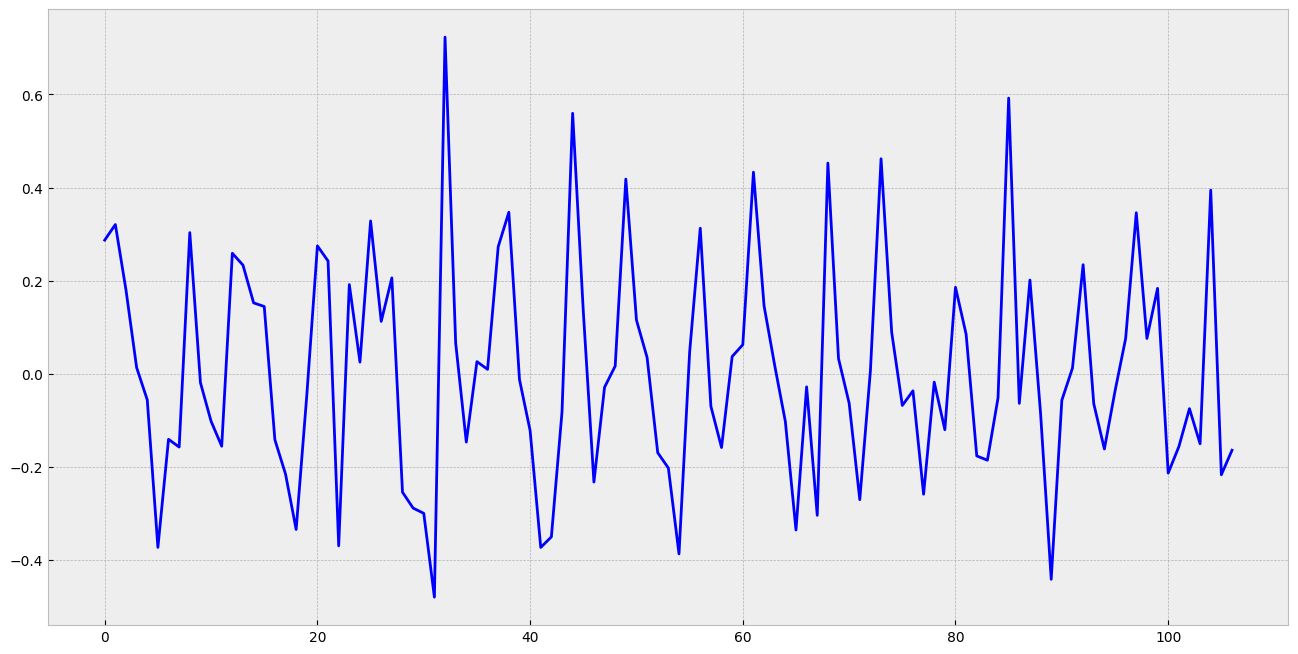

In [69]:
series3 = np.diff(series3, 1)

with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series3, color='blue')

Теперь проверим наши временные ряды на стационарность. Воспользуемся двумя способами: для первых двух проведем тест Дики-Фуллера, а третьего - построим график автокорреляции ACF

In [41]:
from statsmodels.tsa.stattools import adfuller

In [70]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [71]:
test_stationarity(series1)

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


p-value меньше 0,5, а значит временный ряд о перевозке пасажиров стационарен

In [72]:
test_stationarity(series2)

Results of Dickey-Fuller Test:
Test Statistic                 -4.193835
p-value                         0.000675
#Lags Used                     12.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64


p-value меньше 0,5, а значит временный ряд о покупке машин в Квебеке стационарен

In [73]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [79]:
def tsplot(y, lags=None, figsize=(20, 10), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

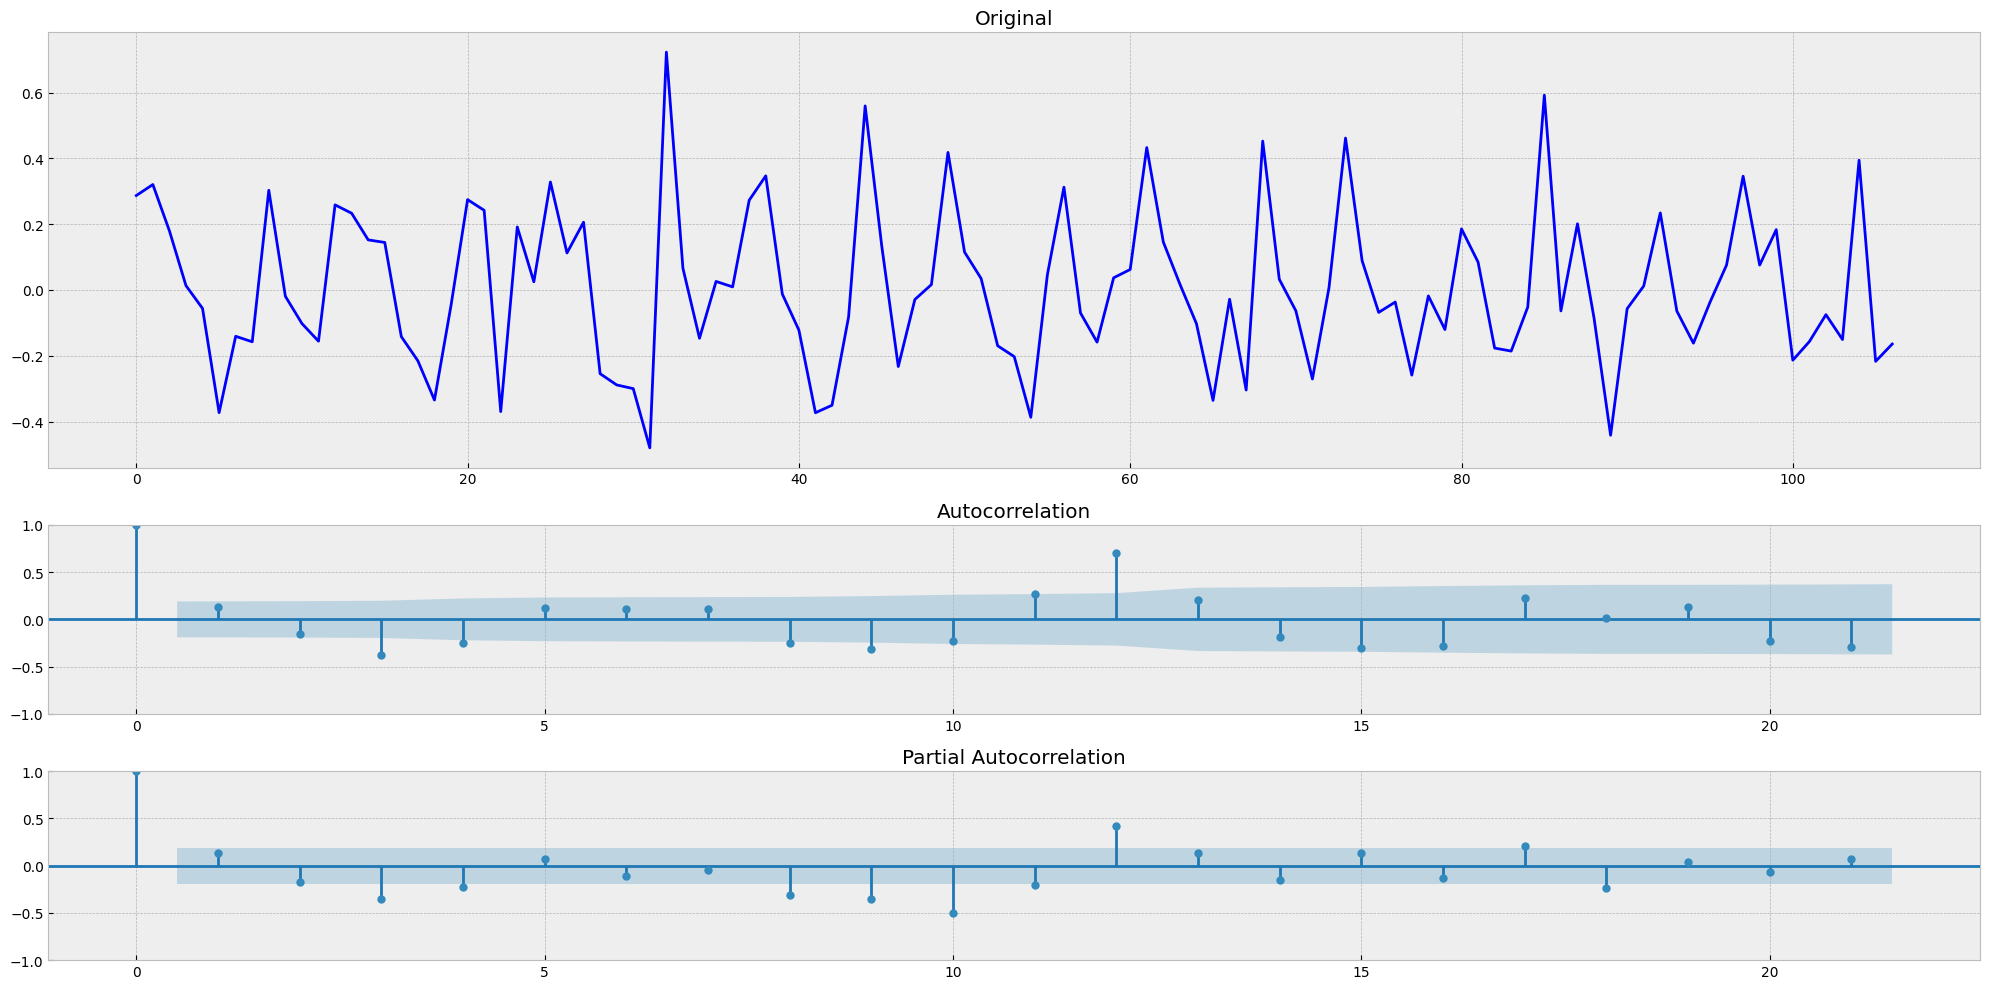

In [80]:
tsplot(series3)

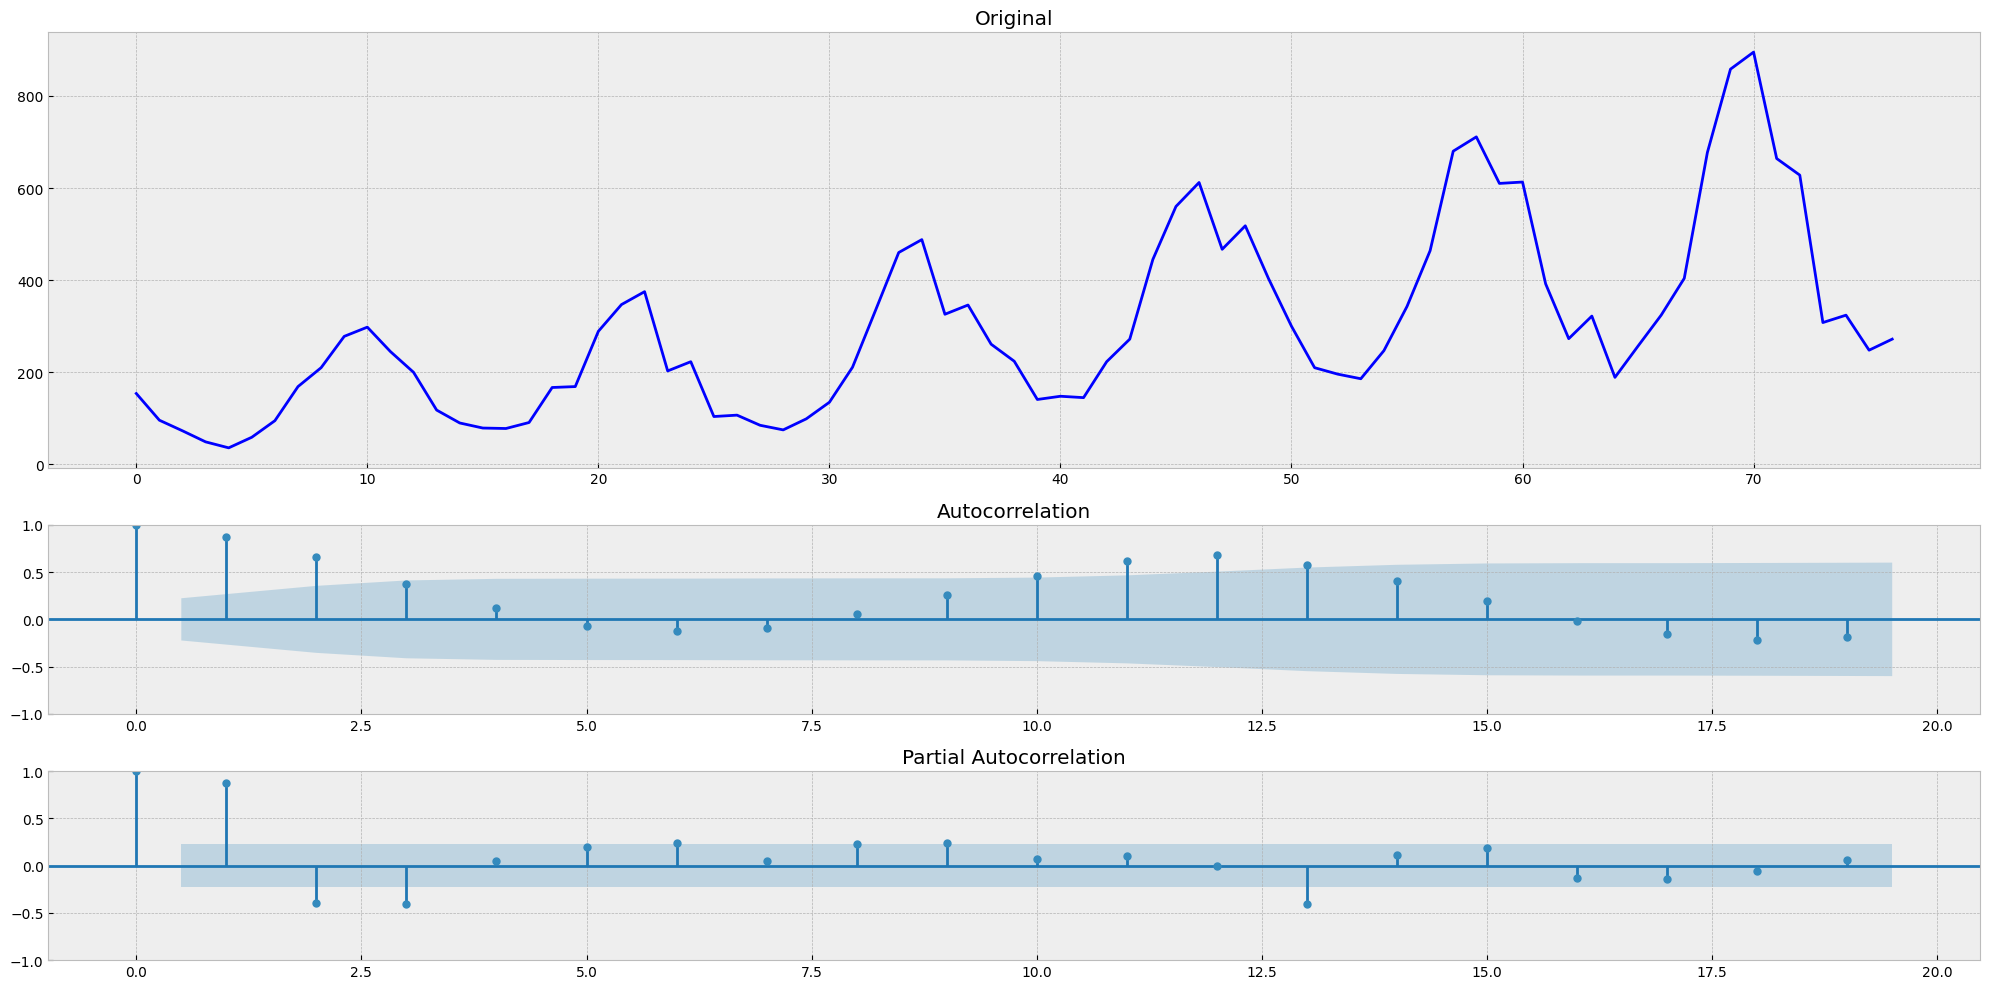

In [81]:
tsplot(all_series["Monthly sales of company X"])

На графике автокорреляции (Autocorrelation)  для данных о продажах компании видим, что измененный до стационарности временный ряд более рваный и хаотичный, чем изначальный, более плавный временный ряд.